**K-mean Clustering**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data and store it in a dataframe
df = pd.read_csv('kmdata.csv')
df

,height,weight
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,71
7,180,70
8,183,84
9,180,88


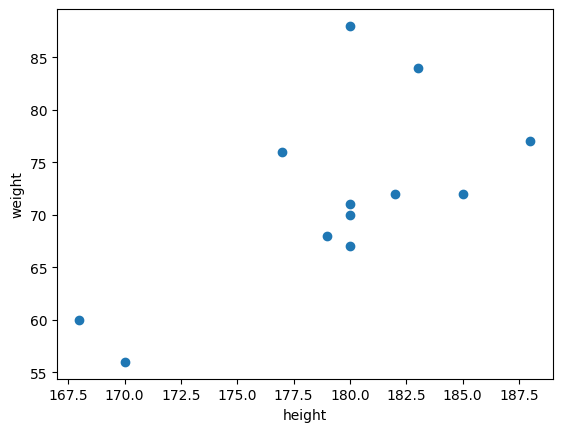

In [3]:
# Plot the data height vs weight
plt.scatter(df['height'], df['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

**K-means clustering from scratch**
- Step 1: Initialize the centroids
- Step 2: Assign the data points to the closest centroid
- Step 3: Update the centroids
- Step 4: Repeat steps 2 and 3 until convergence

In [4]:
# Step 1: Initialize the centroids
# Initialize the centroids to be the k quantiles of the data
def initialize_centroids(df, k):
    # add a column 'label' to the dataframe
    df['label'] = np.zeros(df.shape[0])
    centroids = np.zeros((k, df.shape[1]))
    for i in range(df.shape[1]):
        centroids[:, i] = np.quantile(df.iloc[:, i], np.linspace(0, 1, k + 1))[1:k + 1]
    return centroids

In [5]:
# Step 2: Assign the data points to the closest centroid
# Calculate the distance between each data point and each centroid
# Assign the data point to the closest centroid
def assign_centroids(data, centroids):
    # Calculate the distance between each data point and each centroid
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.sqrt(np.sum((data - centroids[i, :])**2, axis=1))
    # Assign the data point to the closest centroid
    df['label'] = np.argmin(distances, axis=1)
    return df

In [6]:
# Step 3: Update the centroids
# Calculate the mean of the data points assigned to each centroid
# Update the centroids to be the mean of the data points assigned to each centroid
def update_centroids(data, k):
    # Calculate the mean of the data points assigned to each centroid
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(data[data['label'] == i], axis=0)
    return centroids

In [7]:
# Step 4: Repeat steps 2 and 3 until convergence
# Repeat steps 2 and 3 until the centroids do not change
def kmeans(data, k):
    # Initialize the centroids
    centroids = initialize_centroids(data, k)
    # Repeat steps 2 and 3 until the centroids do not change
    while True:
        # Assign the data points to the closest centroid
        labels = assign_centroids(data, centroids)
        # Update the centroids
        new_centroids = update_centroids(data, k)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        # print(centroids, '\n', labels)
    return centroids

In [8]:
# Run the k-means algorithm
centroids = kmeans(df, 3)
centroids

array([[169.   ,  58.   ,   0.   ],
       [181.375,  71.625,   1.   ],
       [181.5  ,  86.   ,   2.   ]])

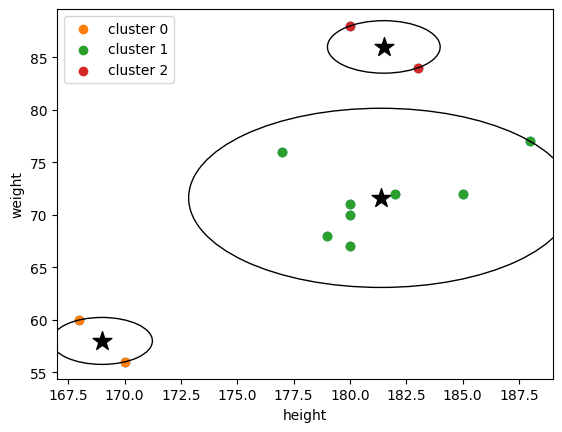

In [9]:
def plot_clusters(data, centroids):
    # Plot the data
    plt.scatter(data['height'], data['weight'])
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k')
    # Plot the data points within each cluster using different colors within a circle
    for i in range(centroids.shape[0]):
        plt.scatter(data[data['label'] == i]['height'], data[data['label'] == i]['weight'], label='cluster ' + str(i))
        # Plot the circle around each cluster from centroid to furthest data point within the cluster
        circle = plt.Circle((centroids[i, 0], centroids[i, 1]), np.max(np.sqrt(np.sum((data[data['label'] == i] - centroids[i, :])**2, axis=1))), color='k', fill=False)
        plt.gca().add_artist(circle)
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend()
    plt.show()

# Plot the clusters
plot_clusters(df, centroids)